In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataExploration').getOrCreate()

In [2]:
data = spark.read.csv("Datasets/Full-Time Equivalent Employees by Industry (ANZSIC06) and Sex (Qrtly-MarJunSepDec).csv",inferSchema=True,header=True)

In [3]:
data.show()

+-----------+-------------------+------+----------------------------------------+
|YearQuarter|           Industry|Gender|Number of Full-Time Equivalent Employees|
+-----------+-------------------+------+----------------------------------------+
|     1989Q1|Forestry and Mining|  Male|                                    9400|
|     1989Q2|Forestry and Mining|  Male|                                    8600|
|     1989Q3|Forestry and Mining|  Male|                                    8300|
|     1989Q4|Forestry and Mining|  Male|                                    7900|
|     1990Q1|Forestry and Mining|  Male|                                    8100|
|     1990Q2|Forestry and Mining|  Male|                                    7500|
|     1990Q3|Forestry and Mining|  Male|                                    8100|
|     1990Q4|Forestry and Mining|  Male|                                    7800|
|     1991Q1|Forestry and Mining|  Male|                                    8500|
|     1991Q2|For

In [4]:
results = data.filter("Industry = 'All Industries'").select('YearQuarter','Gender','Number of Full-Time Equivalent Employees')
resultsM = results.filter("Gender = 'Male'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsM.show()
resultsF = results.filter("Gender = 'Female'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsF.show()

+-----------+----------------------------------------+
|YearQuarter|Number of Full-Time Equivalent Employees|
+-----------+----------------------------------------+
|     1989Q1|                                  563300|
|     1989Q2|                                  554200|
|     1989Q3|                                  539400|
|     1989Q4|                                  526900|
|     1990Q1|                                  535400|
|     1990Q2|                                  525400|
|     1990Q3|                                  522900|
|     1990Q4|                                  522400|
|     1991Q1|                                  535100|
|     1991Q2|                                  519300|
|     1991Q3|                                  495400|
|     1991Q4|                                  495800|
|     1992Q1|                                  509800|
|     1992Q2|                                  504600|
|     1992Q3|                                  488200|
|     1992

In [5]:
resultsX = data.filter("Industry = 'Information Media and Telecommunications'").select('YearQuarter','Gender','Number of Full-Time Equivalent Employees')
resultsXM = resultsX.filter("Gender = 'Male'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsXM.show()
resultsXF = resultsX.filter("Gender = 'Female'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsXF.show()

+-----------+----------------------------------------+
|YearQuarter|Number of Full-Time Equivalent Employees|
+-----------+----------------------------------------+
|     1989Q1|                                   11000|
|     1989Q2|                                   10800|
|     1989Q3|                                   10600|
|     1989Q4|                                   10200|
|     1990Q1|                                   10300|
|     1990Q2|                                   10200|
|     1990Q3|                                   10000|
|     1990Q4|                                   10000|
|     1991Q1|                                   10200|
|     1991Q2|                                   10000|
|     1991Q3|                                    9600|
|     1991Q4|                                    9600|
|     1992Q1|                                    9600|
|     1992Q2|                                    9700|
|     1992Q3|                                    9300|
|     1992

In [6]:
resultsY = data.filter("Industry = 'Wholesale Trade'").select('YearQuarter','Gender','Number of Full-Time Equivalent Employees')
resultsYM = resultsY.filter("Gender = 'Male'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsYM.show()
resultsYF = resultsY.filter("Gender = 'Female'").select('YearQuarter','Number of Full-Time Equivalent Employees')
resultsYF.show()

+-----------+----------------------------------------+
|YearQuarter|Number of Full-Time Equivalent Employees|
+-----------+----------------------------------------+
|     1989Q1|                                   43400|
|     1989Q2|                                   41400|
|     1989Q3|                                   41000|
|     1989Q4|                                   39200|
|     1990Q1|                                   41600|
|     1990Q2|                                   39200|
|     1990Q3|                                   40400|
|     1990Q4|                                   40800|
|     1991Q1|                                   42800|
|     1991Q2|                                   39600|
|     1991Q3|                                   38700|
|     1991Q4|                                   38800|
|     1992Q1|                                   40900|
|     1992Q2|                                   39700|
|     1992Q3|                                   39400|
|     1992

In [7]:
results1 = resultsM.toPandas()
results2 = resultsF.toPandas()

In [8]:
results3 = resultsXM.toPandas()
results4 = resultsXF.toPandas()

In [9]:
results5 = resultsYM.toPandas()
results6 = resultsYF.toPandas()

In [10]:
import matplotlib.pyplot as plt

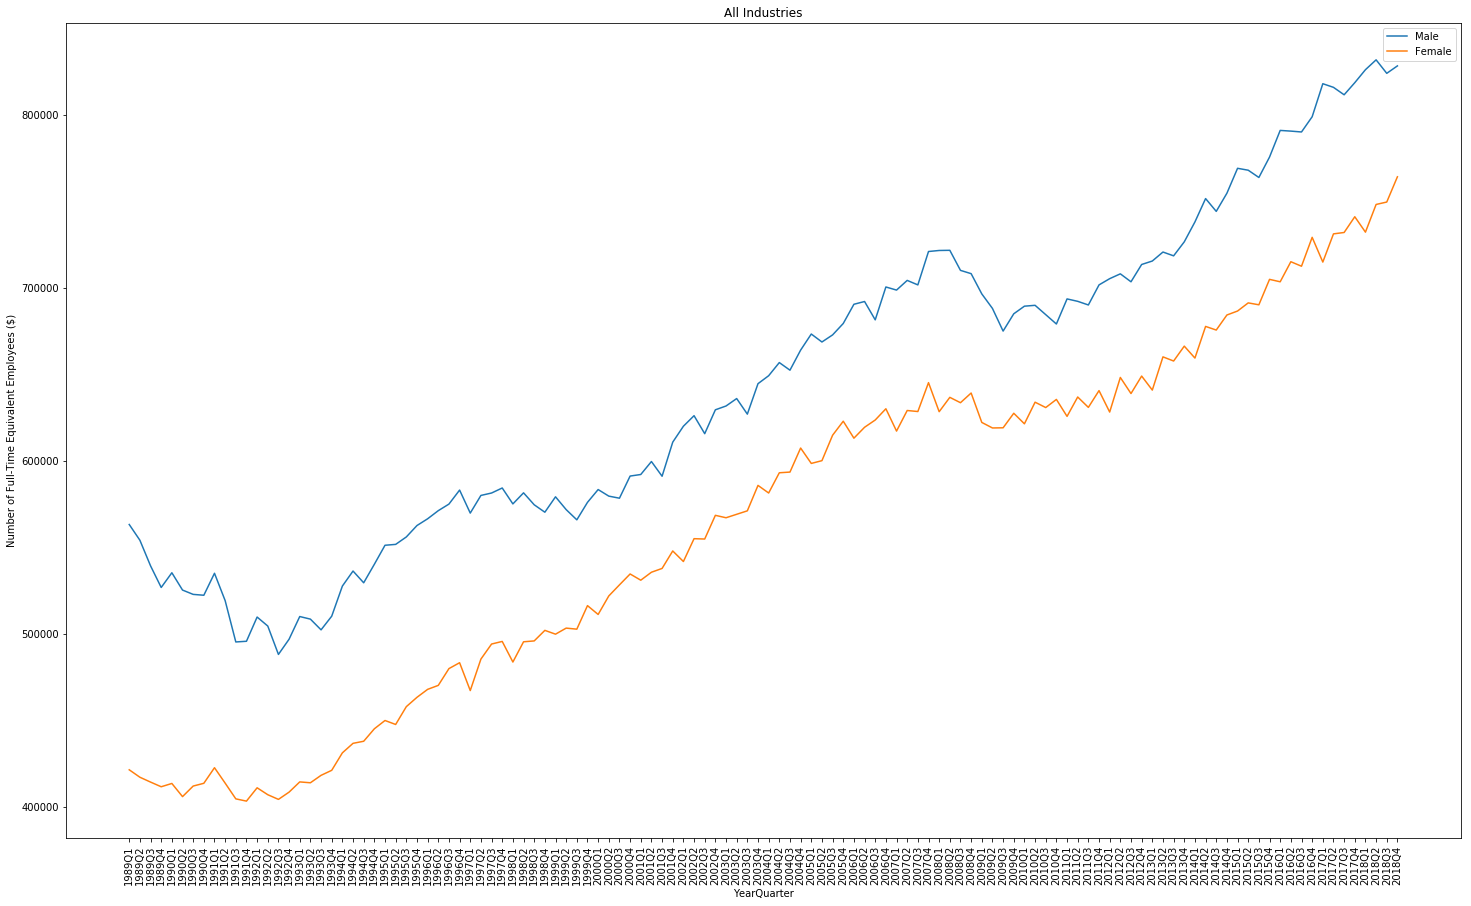

In [16]:
names = results1['YearQuarter']
values1 = results1['Number of Full-Time Equivalent Employees']
values2 = results2['Number of Full-Time Equivalent Employees']

fig, ax = plt.subplots()
ax.plot(names, values1, label="Male")
ax.plot(names, values2, label="Female")
ax.legend()

ax.set_xlabel('YearQuarter')
ax.set_ylabel('Number of Full-Time Equivalent Employees ($)')
ax.set_title('All Industries')

plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (25,15)

plt.show()

In [12]:
import matplotlib.pyplot as plt2

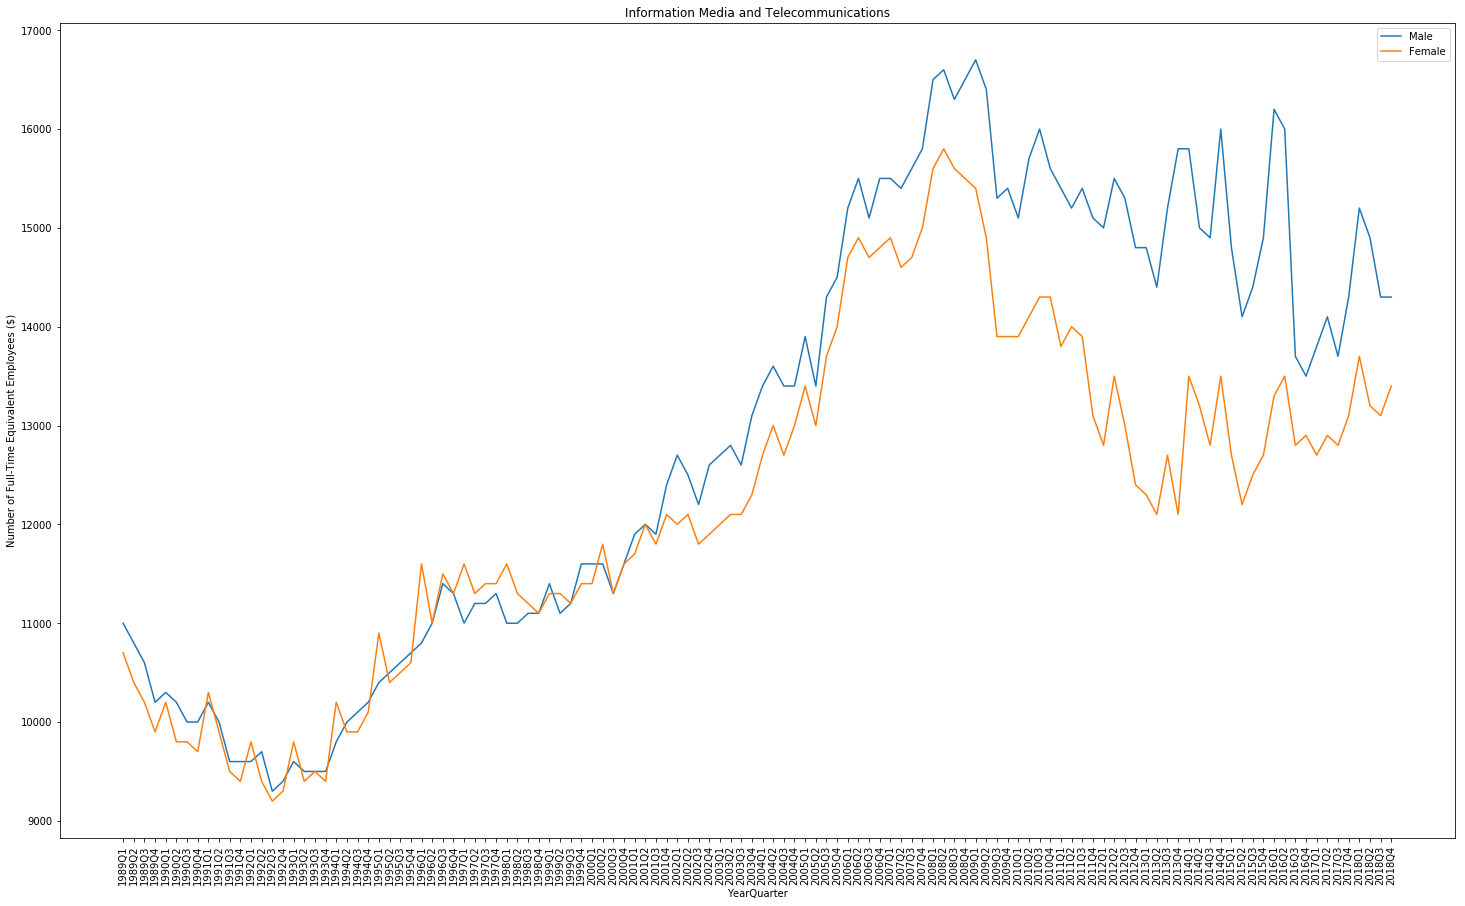

In [13]:
names2 = results3['YearQuarter']
values3 = results3['Number of Full-Time Equivalent Employees']
values4 = results4['Number of Full-Time Equivalent Employees']

fig1, ax1 = plt2.subplots()
ax1.plot(names2, values3, label="Male")
ax1.plot(names2, values4, label="Female")
ax1.legend()

ax1.set_xlabel('YearQuarter')
ax1.set_ylabel('Number of Full-Time Equivalent Employees ($)')
ax1.set_title('Information Media and Telecommunications')

plt2.xticks(rotation=90)

plt2.rcParams["figure.figsize"] = (25,15)

plt2.show()

In [14]:
import matplotlib.pyplot as plt3

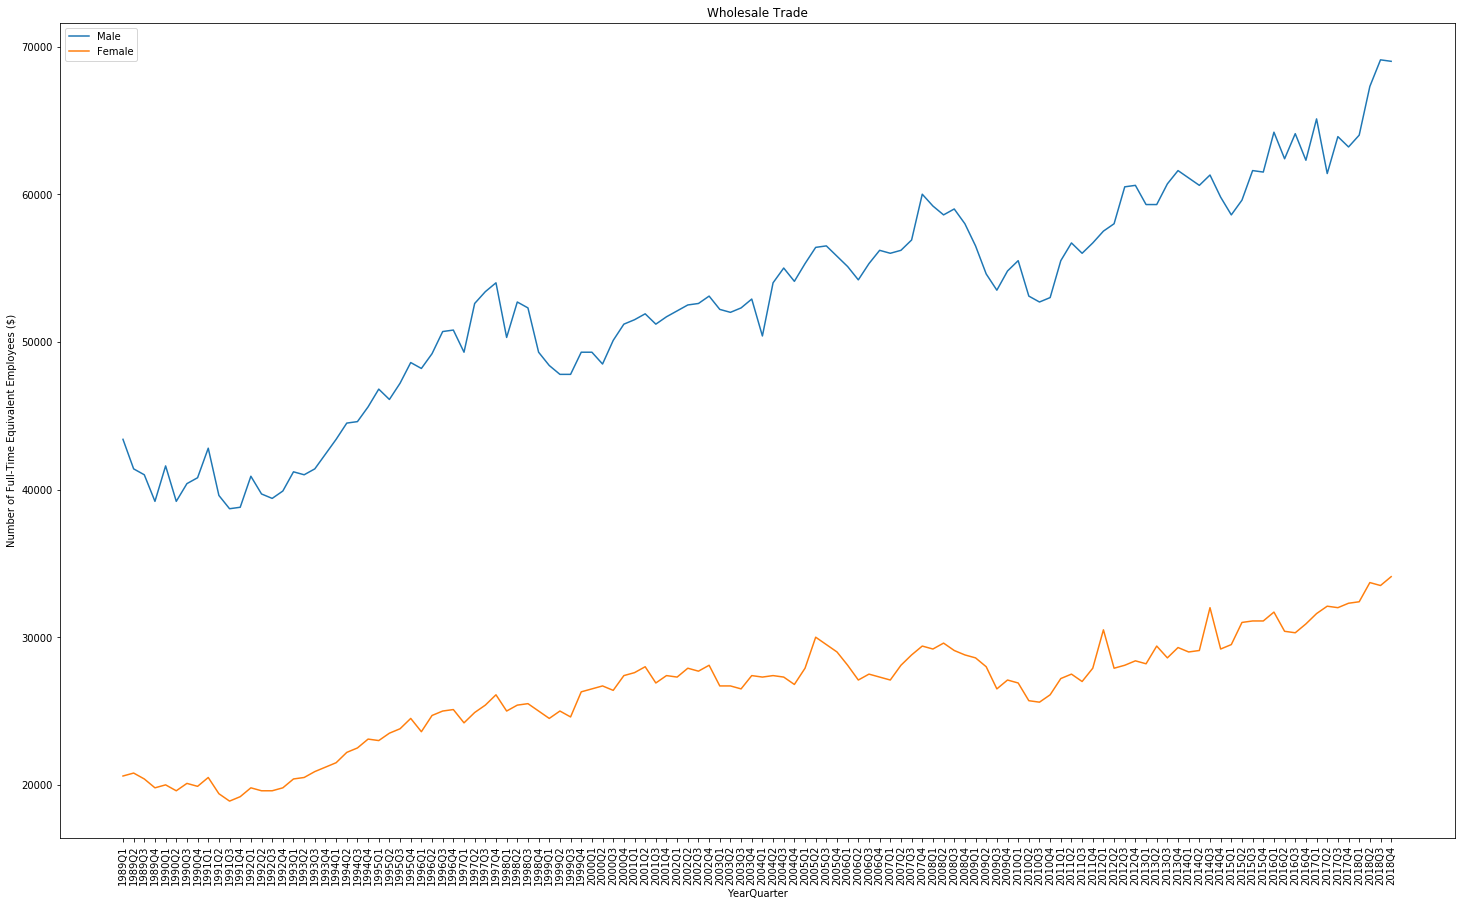

In [15]:
names3 = results5['YearQuarter']
values5 = results5['Number of Full-Time Equivalent Employees']
values6 = results6['Number of Full-Time Equivalent Employees']

fig2, ax2 = plt.subplots()
ax2.plot(names3, values5, label="Male")
ax2.plot(names3, values6, label="Female")
ax2.legend()

ax2.set_xlabel('YearQuarter')
ax2.set_ylabel('Number of Full-Time Equivalent Employees ($)')
ax2.set_title('Wholesale Trade')

plt3.xticks(rotation=90)

plt3.rcParams["figure.figsize"] = (25,15)

plt3.show()